<a href="https://colab.research.google.com/github/Evan25-hash/HandWritting-Recognition/blob/main/Model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries: TensorFlow, NumPy, Matplotlib
!pip install tensorflow numpy matplotlib

In [2]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist  # Import MNIST dataset
from tensorflow.keras.utils import to_categorical  # For one-hot encoding labels
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import for data augmentation

In [3]:
# Download and load the MNIST dataset (handwritten digit images)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize pixel values of images to a range of 0 to 1 (original range is 0 to 255)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# Reshape image data to include the channel dimension (required for CNN)
# Shape changes from (28, 28) to (28, 28, 1) where 1 is the number of channels (grayscale)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


In [6]:
# One-hot encode the labels to create categorical labels (for 10 digit classes: 0-9)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
# Data Augmentation: Apply random transformations to the training data to increase variety and prevent overfitting
datagen = ImageDataGenerator(
    rotation_range=15,         # Rotate the image by up to 15 degrees
    width_shift_range=0.1,     # Shift the image width by up to 10%
    height_shift_range=0.1,    # Shift the image height by up to 10%
    zoom_range=0.1,            # Zoom the image by up to 10%
    fill_mode='nearest'        # Fill in any gaps created by the transformations using the nearest pixel value
)

In [8]:
# Fit the data generator to the training data, preparing it to generate augmented images during training
datagen.fit(x_train)

In [9]:
# Define a Convolutional Neural Network (CNN) model for digit recognition
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer with 32 filters
    layers.MaxPooling2D((2, 2)),  # Max-pooling to reduce spatial dimensions
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer with 64 filters
    layers.MaxPooling2D((2, 2)),  # Second max-pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Third convolutional layer with 64 filters
    layers.Flatten(),  # Flatten the output for the fully connected layers
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit class)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy as the evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Train the model using the augmented data generator, for 10 epochs, with a batch size of 64
# Use the test set as validation data to monitor performance
model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 78ms/step - accuracy: 0.9892 - loss: 0.0339 - val_accuracy: 0.9921 - val_loss: 0.0251
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 73ms/step - accuracy: 0.9891 - loss: 0.0343 - val_accuracy: 0.9939 - val_loss: 0.0199
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 73ms/step - accuracy: 0.9903 - loss: 0.0312 - val_accuracy: 0.9943 - val_loss: 0.0171
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 72s 77ms/step - accuracy: 0.9898 - loss: 0.0323 - val_accuracy: 0.9948 - val_loss: 0.0170
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 74ms/step - accuracy: 0.9904 - loss: 0.0322 - val_accuracy: 0.9943 - val_loss: 0.0185
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 73ms/step - accuracy: 0.9915 - loss: 0.0267 - val_accuracy: 0.9925 - val_loss: 0.0229
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 73ms/step - accuracy: 0.9915 - loss: 0.0285 - val_accuracy: 0.9870 - val_loss: 0.0419
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 73ms/step - accuracy: 0.9918 - loss: 0.0257 - 

In [13]:
# Evaluate the model on the test set to calculate the loss and accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9866 - loss: 0.0425
Test accuracy: 0.9894000291824341


In [14]:
# Save the trained model to a file
model.save('handwriting_recognition_model.h5')

In [15]:
# Function to predict a digit from an input image (28x28 grayscale)
def predict_digit(image):
    image = np.expand_dims(image, axis=0)  # Add a batch dimension to the input image (1, 28, 28, 1)
    prediction = model.predict(image)  # Perform prediction
    predicted_class = np.argmax(prediction)  # Return the class with the highest probability
    return predicted_class


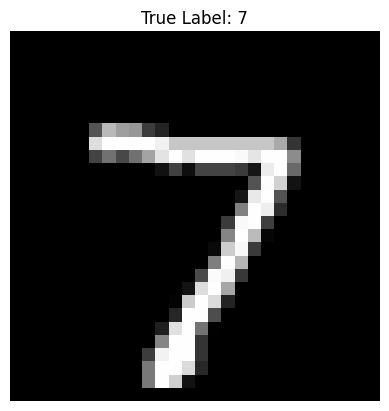

In [17]:
# Example of testing: Display the first test image and its true label
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')  # Reshape the image to 28x28 and display in grayscale
plt.title(f'True Label: {np.argmax(y_test[0])}')  # Display the true label for the image
plt.axis('off')  # Hide axis
plt.show()

In [18]:
# Predict and display the predicted class for the first test image
print("Predicted Class:", predict_digit(x_test[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted Class: 7


In [19]:
# Install OpenCV library for image processing and handling
!pip install opencv-python
!pip install opencv-python-headless


In [20]:
import cv2
from google.colab import files
from PIL import Image

Saving handwriting3.jpg to handwriting3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━

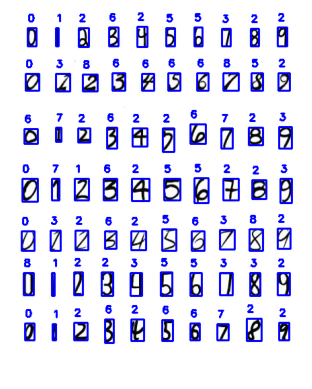

In [23]:
# Function to upload an image file (for testing with external images)
def upload_image():
    uploaded = files.upload()  # Upload a file
    for filename in uploaded.keys():
        return filename  # Return the filename of the uploaded image

# Function to detect digits in an image and predict their classes
def detect_and_predict(image_path):
    # Read the image from the provided file path
    image = cv2.imread(image_path)
    original_image = image.copy()  # Make a copy of the original image for visualization

    # Convert the image to grayscale (needed for digit detection)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image, where digits are white (255) and background is black (0)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Find contours (outlines of the digits) in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        # Get bounding box coordinates for each contour (digit)
        x, y, w, h = cv2.boundingRect(contour)

        # Only consider contours that are large enough to be digits (filter out small noise)
        if w * h > 100:  # Ignore small contours (noise)
            # Extract the region containing the digit from the grayscale image
            digit = gray[y:y+h, x:x+w]
            digit = cv2.resize(digit, (28, 28))  # Resize the digit to 28x28 pixels (required by the model)
            digit = digit.astype('float32') / 255.0  # Normalize the digit pixel values

            # Add batch and channel dimensions to the digit for model prediction
            digit = np.expand_dims(digit, axis=(0, -1))

            # Predict the digit class using the trained model
            prediction = model.predict(digit)
            predicted_class = np.argmax(prediction)

            # Draw a bounding box around the detected digit in the original image
            cv2.rectangle(original_image, (x, y), (x+w, y+h), (255, 0, 0), 2)

            # Add the predicted class as text above the bounding box
            text = f'{predicted_class}'
            cv2.putText(original_image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the original image with bounding boxes and predictions
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.axis('off')  # Hide axis
    plt.show()

# Upload an image to test digit detection and prediction
image_path = upload_image()

# Detect digits in the uploaded image and predict their classes
detect_and_predict(image_path)